# I. Pretty Midi (for midi files)

In [1]:
# https://nbviewer.jupyter.org/github/craffel/pretty-midi/blob/master/Tutorial.ipynb
# For Python2.6 compatibility
from __future__ import print_function

import os

import pretty_midi
import numpy as np

# For plotting
#import mir_eval.display
#import librosa.display
#import matplotlib.pyplot as plt
#%matplotlib inline

# For putting audio in the notebook
# to play audio, you must install fluidsynth v1.1.x, NOT v2.x; (neither worked for me)
# https://github.com/nwhitehead/pyfluidsynth/issues/19#issuecomment-476739152
import IPython.display
# import fluidsynth # didn't work for me!

## Parsing a MIDI file
The other intended use of pretty_midi is to parse MIDI files, so that they can be manipulated and analyzed. Loading in a MIDI file is simple. pretty_midi should be able to handle all valid MIDI files, and will raise an Exception of the MIDI data is corrupt.

In [9]:
# We'll load in the example.mid file distributed with pretty_midi
pm = pretty_midi.PrettyMIDI('epoch10_recronstructed_song_3.mid')
IPython.display.Audio(pm.synthesize(fs=14000), rate=14000)

In [83]:
# We'll load in the example.mid file distributed with pretty_midi
pm = pretty_midi.PrettyMIDI('test_song.mid')

## Plotting a piano roll
A great way to visualize MIDI data is via a piano roll, which is a time-frequency matrix where each row is a different MIDI pitch and each column is a different slice in time. pretty_midi can produce piano roll matrices for each indivual instrument (via Instrument.get_piano_roll) or the entire PrettyMIDI object (summed across instruments, via PrettyMIDI.get_piano_roll). The spacing in time between subsequent columns of the matrix is determined by the fs parameter.

In [85]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

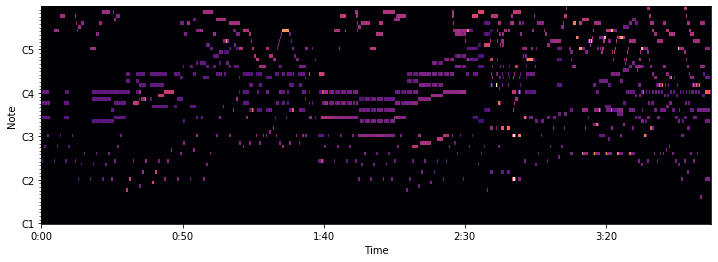

In [86]:
plt.figure(figsize=(12, 4))
plot_piano_roll(pm, 24, 84)

## Sonification
pretty_midi has two main ways to sonify MIDI data: the synthesize and fluidsynth functions. synthesize is a simple and rudimentary method which just synthesizes each note as a sine wave. fluidsynth uses the Fluidsynth program along with a SoundFont file (a simple one is installed alongside pretty_midi) to create a General MIDI synthesis. Note that you must have the Fluidsynth program installed to use the fluidsynth function. Both the Instrument and PrettyMIDI classes have these methods; the PrettyMIDI versions just sum up the syntheses for all of the contained instruments.

In [104]:
# this first method didn't work for me
# must install FluidSynth -- brew install fluidsynth. Still didn't work for me
# https://github.com/FluidSynth/fluidsynth/wiki/Download#distributions
IPython.display.Audio(pm.fluidsynth(fs=16000), rate=16000)

ImportError: fluidsynth() was called but pyfluidsynth is not installed.

In [118]:
# just using a waveform
IPython.display.Audio(pm.synthesize(fs=14000), rate=14000)

In [112]:
# Parsing the MIDI file
# for full list of attributes: https://github.com/craffel/pretty-midi/blob/master/pretty_midi/pretty_midi.py
print('There are {} time signature changes'.format(len(pm.time_signature_changes)))
print('There are {} instruments'.format(len(pm.instruments)))
print('Instrument 3 has {} notes'.format(len(pm.instruments[0].notes)))
print('Instrument 4 has {} pitch bends'.format(len(pm.instruments[4].pitch_bends)))
print('Instrument 5 has {} control changes'.format(len(pm.instruments[5].control_changes)))

for i in pm.instruments:
    print(i.name)
    
print(pm.key_signature_changes)
print(pm.get_tempo_changes()[1])
print(pm.time_signature_changes)
print(pm.get_end_time())
print([l.text for l in pm.lyrics])

There are 1 time signature changes
There are 11 instruments
Instrument 3 has 156 notes
Instrument 4 has 1 pitch bends
Instrument 5 has 5 control changes
Violin I
Piano Solo RH
Piano Solo LH
Bass
Violin II
Viola
Cello
String Pizz
Flutes
Oboes
Bassoons
[KeySignature(key_number=5, time=0.0)]
[52.00000693 53.00002208 54.0000054  53.00002208 56.00002987 59.00000885
 58.00004253 56.00002987 55.00000458 58.00004253 55.00000458 58.00004253
 55.00000458 56.00002987 53.00002208 54.0000054  57.00003135 53.00002208
 54.0000054  58.00004253 59.00000885 58.00004253 54.0000054  55.00000458
 54.0000054  53.00002208 54.0000054  52.00000693 51.0000255  53.00002208
 51.0000255  55.00000458 53.00002208 55.00000458 57.00003135 54.0000054
 53.00002208 54.0000054  51.0000255  54.0000054  53.00002208 52.00000693
 49.00003185 52.00000693 51.0000255  54.0000054  50.         52.00000693
 50.         51.0000255  50.         49.00003185 53.00002208 51.0000255
 50.         52.00000693 51.0000255  48.         52.000

### Harmonic Information
Beyond metrical information, pretty_midi contains a few utility functions for measuring statistics about the harmonic content of the MIDI sequence. However, it's also designed so that additional analysis is easy.

Text(0, 0.5, 'Proportion')

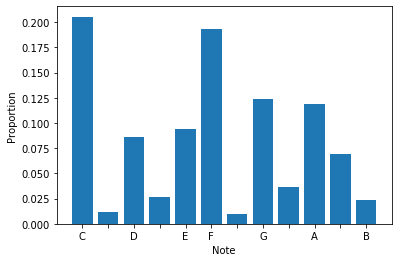

In [111]:
# Plot a pitch class distribution - sort of a proxy for key
plt.bar(np.arange(12), pm.get_pitch_class_histogram());
plt.xticks(np.arange(12), ['C', '', 'D', '', 'E', 'F', '', 'G', '', 'A', '', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

## Pitch Transition Matrix

In [113]:
p_mat = pm.get_pitch_class_transition_matrix()
p_mat

array([[ 8.,  2.,  7.,  1.,  5.,  6.,  0.,  4.,  0.,  5., 10.,  5.],
       [ 1.,  0.,  4.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  1.,  0.,  3.,  9.,  5.,  0., 11.,  1.,  2.,  0.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.],
       [ 5.,  2.,  7.,  0.,  1., 29.,  1.,  3.,  0.,  0.,  0.,  0.],
       [ 9.,  0.,  3.,  0., 26.,  1.,  0.,  5.,  0.,  5.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.],
       [ 7.,  0.,  4.,  0.,  3.,  9.,  2.,  0.,  1.,  8.,  2.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.],
       [ 8.,  0.,  1.,  0.,  1.,  2.,  1.,  8.,  1.,  0.,  1.,  1.],
       [ 9.,  0.,  2.,  0.,  0.,  1.,  0.,  1.,  1.,  3.,  1.,  0.],
       [ 4.,  0.,  5.,  0.,  0.,  1.,  0.,  1.,  0.,  6.,  0.,  0.]])

# II. Music 21 by MIT

In [ ]:
from music21 import converter, instrument, note, chord
notes = []
for file in glob.glob("midi_songs/*.mid"):
    midi = converter.parse(file)
    notes_to_parse = None
    parts = instrument.partitionByInstrument(midi)
    if parts: # file has instrument parts
        notes_to_parse = parts.parts[0].recurse()
    else: # file has notes in a flat structure
        notes_to_parse = midi.flat.notes
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))

# III. Tutorial from Lakh
This is needelessly complicated. Refer to part I instead.

In [67]:
# https://github.com/craffel/midi-dataset/blob/master/Tutorial.ipynb
    
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pretty_midi
import librosa
import librosa.display
import mir_eval
import mir_eval.display
import tables
import IPython.display
import os
import json

# Local path constants
DATA_PATH = 'data'
RESULTS_PATH = 'Lakh Midi' #  'lmd_matched' # 'results'
# Path to the file match_scores.json distributed with the LMD
SCORE_FILE = os.path.join(RESULTS_PATH, 'match_scores.json')

# Utility functions for retrieving paths
def msd_id_to_dirs(msd_id):
    """Given an MSD ID, generate the path prefix.
    E.g. TRABCD12345678 -> A/B/C/TRABCD12345678"""
    return os.path.join(msd_id[2], msd_id[3], msd_id[4], msd_id)

def msd_id_to_mp3(msd_id):
    """Given an MSD ID, return the path to the corresponding mp3"""
    return os.path.join(DATA_PATH, 'msd', 'mp3',
                        msd_id_to_dirs(msd_id) + '.mp3')

def msd_id_to_h5(h5):
    """Given an MSD ID, return the path to the corresponding h5"""
    return os.path.join(RESULTS_PATH, 'lmd_matched_h5',
                        msd_id_to_dirs(msd_id) + '.h5')

def get_midi_path(msd_id, midi_md5, kind):
    """Given an MSD ID and MIDI MD5, return path to a MIDI file.
    kind should be one of 'matched' or 'aligned'. """
    return os.path.join(RESULTS_PATH, 'lmd_{}'.format(kind),
                        msd_id_to_dirs(msd_id), midi_md5 + '.mid')

## Data Layout

In [17]:
with open(SCORE_FILE) as f:
    scores = json.load(f)
# Grab a Million Song Dataset ID from the scores dictionary
msd_id = list(scores.keys())[1234]
print('Million Song Dataset ID {} has {} MIDI file matches:'.format(
    msd_id, len(scores[msd_id])))
for midi_md5, score in scores[msd_id].items():
    print('  {} with confidence score {}'.format(midi_md5, score))

Million Song Dataset ID TRFIAIQ128F92E63F6 has 2 MIDI file matches:
  de8c3a059eade88d6560b399f7833f73 with confidence score 0.5273469231625926
  5b0c2b2ddb69956d7f2c5725eb81f417 with confidence score 0.5995753568226387


This Million Song Dataset entry has 5 MIDI files matched to it, with scores between ~.69 and .78. There are multiple MIDI files matched to this one Million Song Dataset entry because the Lakh MIDI Dataset has multiple different MIDI transcriptions of this single piece of music.

## Utilizing Aligned MIDI Files

In [18]:
while True:
    # Grab an MSD ID and its dictionary of matches
    msd_id, matches = scores.popitem()
    # Grab a MIDI from the matches
    midi_md5, score = matches.popitem()
    # Construct the path to the aligned MIDI
    aligned_midi_path = get_midi_path(msd_id, midi_md5, 'aligned')
    # Load/parse the MIDI file with pretty_midi
    pm = pretty_midi.PrettyMIDI(aligned_midi_path)
    # Look for a MIDI file which has lyric and key signature change events
    if len(pm.lyrics) > 5 and len(pm.key_signature_changes) > 0:
        break

## Pianoroll Visualization

In [19]:
# Retrieve piano roll of the MIDI file
piano_roll = pm.get_piano_roll()
# Use 7 octaves starting from C1
piano_roll = piano_roll[12:96]

# # Retrieve the audio corresponding to this MSD entry
# audio, fs = librosa.load(msd_id_to_mp3(msd_id))
# # Compute constant-Q spectrogram
# cqt = librosa.logamplitude(librosa.cqt(audio))
# # Normalize for visualization
# cqt = librosa.util.normalize(cqt)

Text(0.5, 1.0, 'MIDI piano roll')

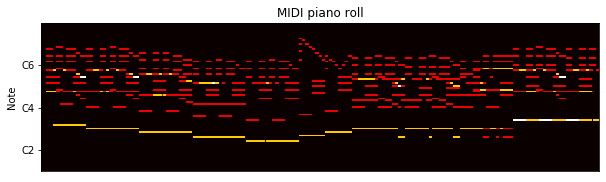

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(211)
librosa.display.specshow(piano_roll, y_axis='cqt_note', cmap=plt.cm.hot)
plt.title('MIDI piano roll')

In MIDI files, different instruments are transcribed on different tracks or channels, which allows them to be separated easily. You can therefore easily get per-instrument piano rolls with pretty_midi. This enables the potential of creating annotations for melody extraction and score-informed source separation. Note that while methods exist for giving instruments arbitrary text names, in practice are limited to the instruments in the General MIDI specification.

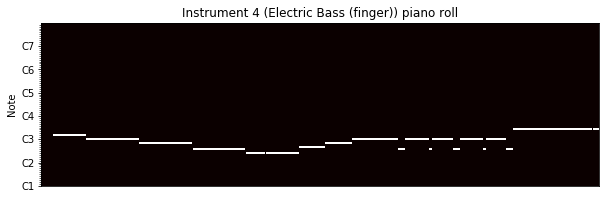

In [22]:
# Retrieve piano roll of one of the instruments
piano_roll = pm.instruments[4].get_piano_roll()
piano_roll = piano_roll[12:96]
plt.figure(figsize=(10, 3))
librosa.display.specshow(piano_roll, y_axis='cqt_note', cmap=plt.cm.hot)
# Get the text name of this instrument's program number
program_name = pretty_midi.program_to_instrument_name(pm.instruments[4].program)
plt.title('Instrument 4 ({}) piano roll'.format(program_name));

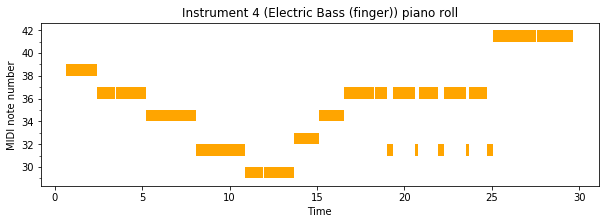

In [23]:
# pretty_midi also provides direct access to the pitch and start/end time of each note
intervals = np.array([[note.start, note.end] for note in pm.instruments[4].notes])
notes = np.array([note.pitch for note in pm.instruments[4].notes])
plt.figure(figsize=(10, 3))
mir_eval.display.piano_roll(intervals, midi=notes, facecolor='orange')
plt.title('Instrument 4 ({}) piano roll'.format(program_name))
plt.xlabel('Time')
plt.ylabel('MIDI note number');

# IV. Tutorial from pypianoroll
This uses npz files (zipped numpy arrays that some researchers have used instead for some reason).

In [66]:
from pypianoroll import Multitrack, Track, plot_multitrack
import numpy as np
import time

### ...with train_x_lpd_5

In [77]:
train_path = os.path.join('Lakh Midi Pianoroll', 'lpd_5', 'train_x_lpd_5_phr.npz')
# load npz file (zipped archive of files; each file contains 1 variable in .npy format)

npzfile = np.load(train_path)

def process_original_data(path):
    with np.load(path) as loaded:
        shape = loaded['shape']
        data = np.zeros(shape=shape).astype(bool)
    
        # create matrix
        stime = time.time()
        data[[x for x in loaded['nonzero']]] = True
        print("Time taken to load: %s" % (time.time()-stime))

        # slice data to small sample
        small_data = data[:100]
        
        # Cut to two tracks (piano and strings)
        stime = time.time()
        small_data = small_data[:, :, :, :, 1::3]
    return small_data

# train_5 = Multitrack.load(train_path)

In [78]:
train_5 = process_original_data(train_path)
# train_5

/Users/daeilcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


Time taken to load: 26.2570481300354


array([[[[[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],

         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],

         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],

         ...,

         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],

         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
          [False, False],
          [False, False]],

         [[False, False],
          [False, False],
          [False, False],
          ...,
          [False, False],
 

In [76]:
# code from above
RESULTS_PATH = 'Lakh Midi' #  'lmd_matched' # 'results'
# Path to the file match_scores.json distributed with the LMD
TRAIN_FILE = os.path.join(RESULTS_PATH, 'match_scores.json')

# with open(TRAIN_FILE) as f:
#     scores = json.load(f)

with open(TRAIN_FILE) as f:
    scores_t = json.load(f)
    # Grab a Million Song Dataset ID from the scores dictionary
    msd_id_t = list(scores.keys())[123]
    print('Million Song Dataset ID {} has {} MIDI file matches:'.format(
    msd_id_t, len(scores_t[msd_id_t])))
    for midi_md5_t, score_t in scores[msd_id_t].items():
        print('  {} with confidence score {}'.format(midi_md5_t, score))
    
while True:
    # Grab an MSD ID and its dictionary of matches
    msd_id_t, matches_t = scores_t.popitem()
    
    # Grab a MIDI from the matches
    midi_md5_t, score_t = matches_t.popitem()
    
    # Construct the path to the aligned MIDI
    aligned_midi_path_t = get_midi_path(msd_id_t, midi_md5_t, 'aligned')
    
    # Load/parse the MIDI file with pretty_midi
    pm_t = pretty_midi.PrettyMIDI(aligned_midi_path_t)
    
    # Look for a MIDI file which has lyric and key signature change events
    if len(pm_t.lyrics) > 5 and len(pm_t.key_signature_changes) > 0:
        break

In [81]:
proll_t = Multitrack(os.path.join('Lakh Midi Pianoroll', 'lpd_5', 'train_x_lpd_5_phr.npz'))
plot_multitrack(proll_t, 
                track_label='program', 
                grid='off',
               label = 'both')

ValueError: Cannot find 'info.json' in the npz file.

### ... with midi already loaded from start of code

In [ ]:
# # Parse a MIDI file to a `pypianoroll.Multitrack` instance
# another_multitrack = Multitrack('./test.mid')

# # Write the `pypianoroll.Multitrack` instance to a MIDI file
# another_multitrack.write('./test.mid')

In [33]:
# or use the midi file path loaded with aligned_midi_path above
proll_test = Multitrack(aligned_midi_path)

(<Figure size 432x288 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a28dd55f8>,
       dtype=object))

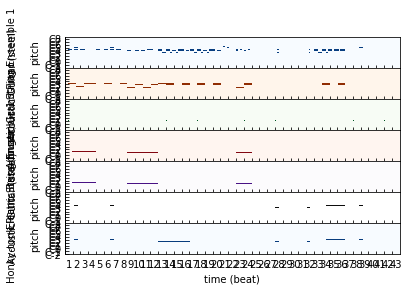

In [65]:
plot_multitrack(proll_test, 
                track_label='program', 
                grid='off',
               label = 'both')
# mode ({'separate', 'stacked', 'hybrid'})
# track_label ({'name', 'program', 'family', 'off'})

(<Figure size 432x288 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2812f6a0>,
       dtype=object))

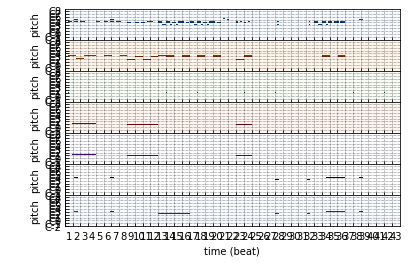

In [46]:
plot(proll_test)

limit those with more than 1 key change
limit those with more than 1 meter change

## Key changes
MIDI files can contain key signature annotations. They are, however, a completely optional meta-event, so many MIDI files don't have one. Because key changes are rare in Western popular music, most MIDI files which do have key signature change annotations only have one.

In [63]:
# Print out all key changes in the MIDI file
for key_change in pm.key_signature_changes:
    print('Key {} starting at time {:.2f}'.format(
        pretty_midi.key_number_to_key_name(key_change.key_number), key_change.time))

Key Bb Major starting at time 0.00


## Lyrics
MIDI files can also optionally have lyrics events, which are essentially timestamped text. Lyrics are often transcribed at the syllable level, but also occasionally at the character or word level. As with meter information, because the MIDI files in LMD-aligned are matched and aligned to 7digital preview MP3s, we can use the MIDI files to obtain timestamped lyrics transcriptions for these recordings.

In [64]:
# Get the boundaries of each line in the lyrics
lines = [0] + [n for n, lyric in enumerate(pm.lyrics) if '\r' in lyric.text]
for start, end in zip(lines[:-1], lines[1:]):
    # Print the times of each lyric in the line, delimited by |
    print('|'.join('{:>8.3f}'.format(lyric.time)
                   for lyric in pm.lyrics[start:end]
                   if lyric.text != '\r'))
    # Print the text of each lyric in the line, delimited by |
    print('|'.join('{:>8}'.format(lyric.text)
                   for lyric in pm.lyrics[start:end]
                   if lyric.text != '\r'))

   0.000|   0.297|   0.650|   0.827|   1.180
    the |    part|     ed |     pag|      es
   1.885|   2.062|   2.415|   3.474
    and |   were |pressed |      in
   3.650|   4.003|   4.533|   4.885|   5.238
 love's |    hot |      fe|  vered |    iron
   6.297|   6.474|   6.650|   7.003|   7.356|   7.709
   like |      a |striped |   pair |     of |  pants.
  16.533|  16.886|  16.886|  17.238|  17.591|  17.944|  18.297|  18.650|  19.003|  19.180
     Mac|       
|      Ar|   thur |   Park |     is |    melt|    ing | in the |    dark
  20.461|  20.638|  20.814|  21.167|  21.565|  21.920|  22.273|  22.978|  23.331
    all |    the | sweet, |  green |      ic|    ing |    flow|    ing |   down.
  25.096|  25.449|  25.802|  26.155|  26.331|  26.684|  27.390|  27.567|  27.920
    Some|    one |   left |    the |   cake |    out |     in |    the |   rain,


## From State Matrix to MIDI

Load in a numpy array representing a note state matrix and convert it to a MIDI file.

In [4]:
from midi_state_matrix import noteStateMatrixToMidi

note_state_matrices = np.load(os.path.join("..", "saved-data", "biaxial_128_output_state_matrices.npy"))
note_state_matrices.shape

for n, note_state_matrix in enumerate(note_state_matrices):
    noteStateMatrixToMidi(note_state_matrix, "epoch10_recronstructed_song_{0}".format(n))

In [10]:
path = "../clean-data/000_When the Children Cry.h5"

pm = pretty_midi.PrettyMIDI(path)
IPython.display.Audio(pm.synthesize(fs=14000), rate=14000)

IOError: MThd not found. Probably not a MIDI file